# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anuncios = pd.read_csv(f"data\Advertising.csv", index_col = 0)

## Exploratory Data Analysis 

In [6]:
anuncios.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [7]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
anuncios.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


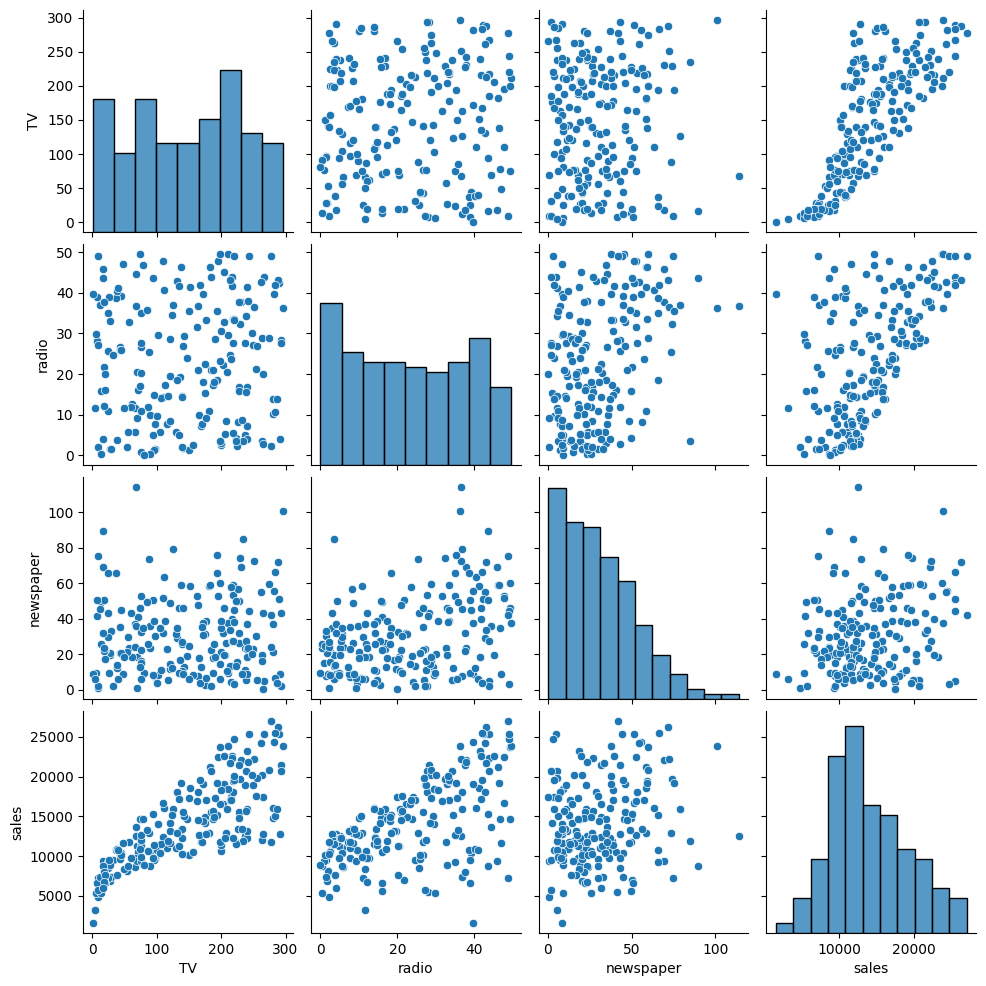

In [10]:
#pairplot
sns.pairplot(anuncios);

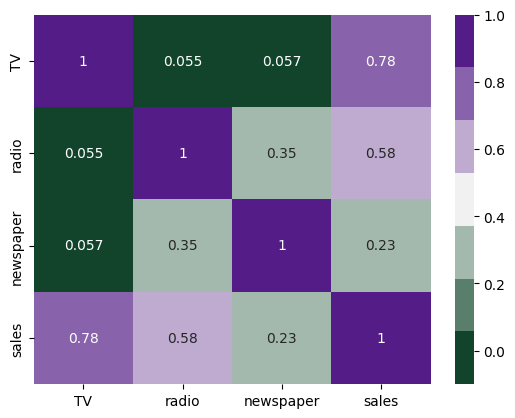

In [11]:
#heatmap
sns.heatmap(anuncios.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

## Modelado

In [3]:
anuncios.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
X = anuncios.loc[:,['TV', 'radio', 'newspaper']]
y = anuncios.loc[:, 'sales']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
#Miramos los shape de cada test y train para ver si lo hemos hecho bien
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train features shape: (160, 3)
Test features shape: (40, 3)
Train target shape: (160,)
Test target shape: (40,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [8]:
#instancia y fit del modelo lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
baseline_error =mean_squared_error(y_test, y_pred)

# instancia y fit del ridge
print('MAE test', mean_absolute_error(y_test, lm.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, lm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lm.predict(X_test))))

MAE test 1361.7813502090278
MAPE test 0.24610850610005602
MSE test 4402118.291449684
RMSE test 2098.12256349568


In [9]:
lm.coef_

array([ 44.58402012, 196.49703416,  -2.78146398])

In [11]:
# instancia y fit del ridge
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)

print('MAE test', mean_absolute_error(y_test, ridgeR.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, ridgeR.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridgeR.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridgeR.predict(X_test))))

MAE test 1361.6785049651598
MAPE test 0.24606998179927492
MSE test 4401206.97804551
RMSE test 2097.905378715997


In [20]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 
alphas

array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

In [12]:
n_alphas = 100
alphas = np.logspace(1, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

errors = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred_ridge = ridge.predict(X_test)
    ridge_error = mean_squared_error(y_pred_ridge, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [13]:
# alpha buena
alphas[err_ridge.index(min(err_ridge))]

np.float64(7390.7220335257825)

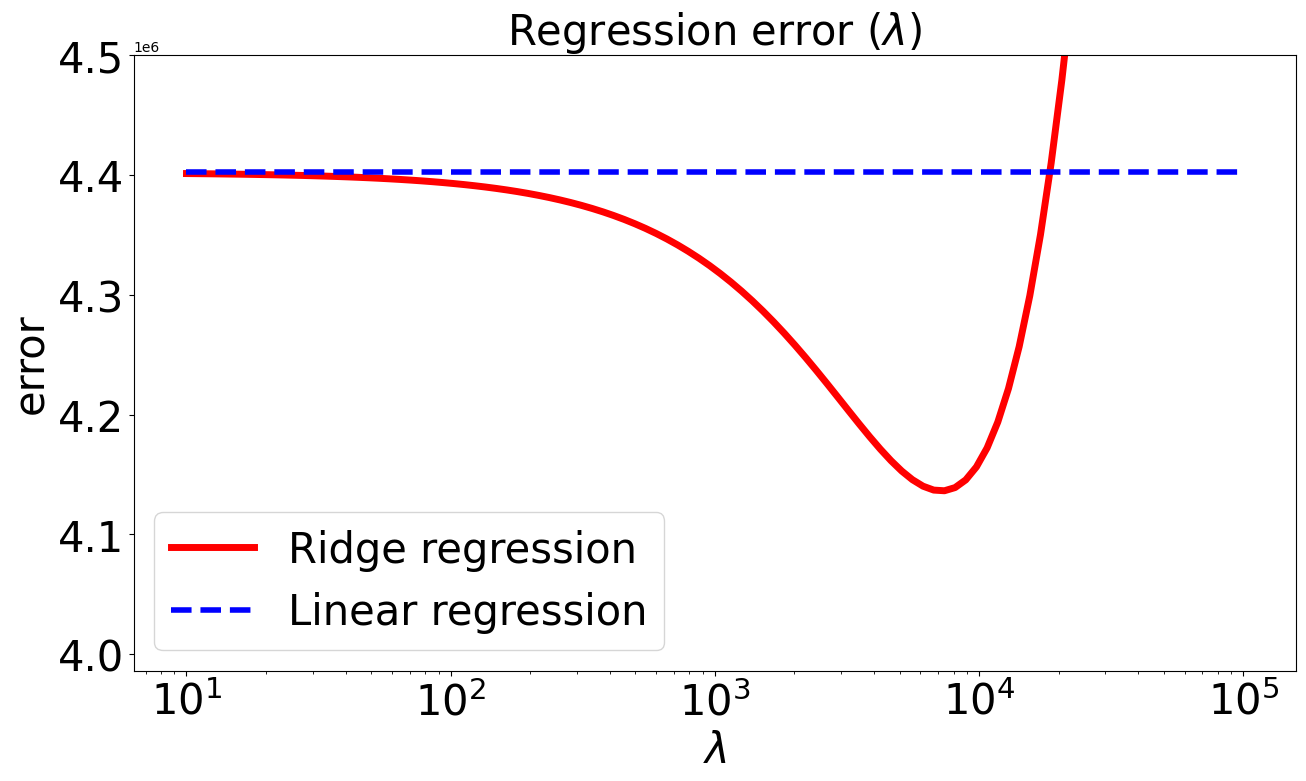

In [42]:
#Soms demasiado buenos y esta grafica os la dejamos.
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [14]:
# entrenar el Ridge con el mejor alpha, CUIDADO QUE IGUAL NO OS SALE IDENTICO!!!
ridgeR_2 = Ridge(alpha = 7390) 
ridgeR_2.fit(X_train, y_train) 


print("Train MSE:" , mean_squared_error(y_train, ridgeR_2.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, ridgeR_2.predict(X_test)))
print("MAE test", mean_absolute_error(y_test, ridgeR_2.predict(X_test)))
print('RMSE test',np.sqrt(mean_squared_error(y_test, ridgeR_2.predict(X_test))))

Train MSE: 2681691.561497259
Test MSE: 4136380.923136422
MAE test 1356.5077098732927
RMSE test 2033.8094608729753


In [26]:
ridgeR_2.intercept_

np.float64(3669.8214061155304)

In [27]:
ridgeR_2.coef_

array([ 44.36516532, 158.83160388,   5.14989114])

In [28]:
lm.coef_

array([ 44.58402012, 196.49703416,  -2.78146398])

In [15]:
# REPETIMOS CON LASSO Y ALPHA=10
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=7000)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(mean_squared_error(y_train, lm.predict(X_train)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lm.predict(X_test)),2))

print("Train MSE: %0.4f" % mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 2406814.76
Test MSE sin regularización: 4402118.29
Train MSE: 2640821.5383
Test MSE: 4225920.4820


In [21]:
n_alphas = 100
alphas_lasso = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline_l = []

for a in alphas_lasso:
    lasso = Lasso(alpha=a)
    
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred_lasso = lasso.predict(X_test)
    lasso_error = mean_squared_error(y_pred_lasso, y_test)    
    err_lasso.append(lasso_error)
    baseline_l.append(baseline_error)

In [22]:
min(err_lasso)

np.float64(4218332.61046398)

In [23]:
err_lasso.index(min(err_lasso))

91

In [24]:
alphas_lasso[91]

np.float64(5722.3676593502205)

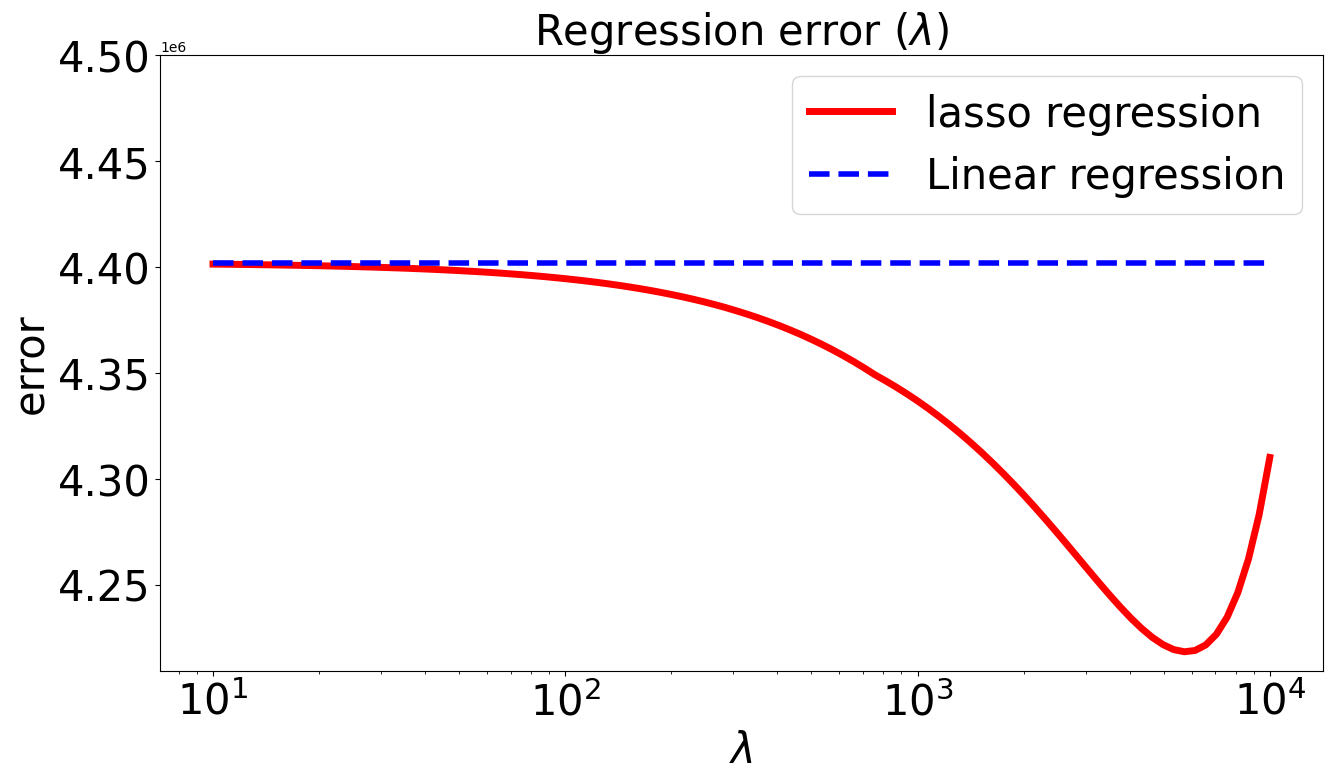

In [25]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas_lasso, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas_lasso, baseline_l, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [26]:
from sklearn.linear_model import Lasso

lassoR_2 = Lasso(alpha = 5722) 
lassoR_2.fit(X_train, y_train) 



print("Train MSE:" , mean_squared_error(y_train, lassoR_2.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, lassoR_2.predict(X_test)))
print("MAE test", mean_absolute_error(y_test, lassoR_2.predict(X_test)))
print('RMSE test',np.sqrt(mean_squared_error(y_test, lassoR_2.predict(X_test))))

Train MSE: 2564215.6350079873
Test MSE: 4218332.856027471
MAE test 1340.9999599083499
RMSE test 2053.85804183918


In [27]:
# elasrtnet alpha=1000, r = 0.1
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 10, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE:" , mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2411637.571970113
Test MSE: 4335456.836381885


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# from sklearn.model_selection import GridSearchCV

# elastic = ElasticNet()

# parameters = {'alpha': np.logspace(0,2,20),
#               'l1_ratio': np.arange(0,1,0.1)
#             }

# elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)

# elastic_gs.fit(X_train, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

# buscad alpha y r con el doble bucle
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=1)
    elastic_net.fit(X_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test)
    elasticnet_error = mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)


In [ ]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=1)
    elastic_net.fit(X_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test)
    elasticnet_error = mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)


MAE test
MSE test
RMSE test


In [55]:
min(err_eln)

np.float64(4218509.703519466)

In [56]:
err_eln.index(min(err_eln))

68

In [57]:
alphas[68]

np.float64(5590.8101825122285)

In [ ]:

# ridge = Ridge()

# parameters = {'alpha': np.logspace(0,5,100)
#             }

# ridge_gs = GridSearchCV(ridge, parameters, cv=3, scoring='neg_mean_squared_error', verbose =200)

# ridge_gs.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START alpha=1.0.................................................
[CV 1/3; 1/100] END ...........alpha=1.0;, score=-1934022.479 total time=   0.0s
[CV 2/3; 1/100] START alpha=1.0.................................................
[CV 2/3; 1/100] END ...........alpha=1.0;, score=-3118333.260 total time=   0.0s
[CV 3/3; 1/100] START alpha=1.0.................................................
[CV 3/3; 1/100] END ...........alpha=1.0;, score=-2731228.109 total time=   0.0s
[CV 1/3; 2/100] START alpha=1.1233240329780274..................................
[CV 1/3; 2/100] END alpha=1.1233240329780274;, score=-1934010.794 total time=   0.0s
[CV 2/3; 2/100] START alpha=1.1233240329780274..................................
[CV 2/3; 2/100] END alpha=1.1233240329780274;, score=-3118339.778 total time=   0.0s
[CV 3/3; 2/100] START alpha=1.1233240329780274..................................
[CV 3/3; 2/100] END alpha=1.1233240329

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9....
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error', verbose=200)

In [ ]:


# ridge = Ridge(alpha=1)
# ridge.fit(X_train, y_train)

# print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
# print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
# print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 1361.7710633068214
MSE test 4402027.062786828
RMSE test 2098.1008228364117


## Resultados

Nos quedmaos con el modelo de Lasso del principio, con un alpha=6000 porque es el modelo que mejor generaliza, o lo que es lo mismo, el modelo que tiene errores más bajos en sus predicciones ante los datos de test.

In [ ]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

# BONUS TRACK:

REPETIR RESULTADOS USANDO POLY FEATURES
